<a href="https://colab.research.google.com/github/luchomengo/Delimitacion-zonas-de-manejo/blob/main/Generar_mapa_de_rendimiento_propiedades_del_suelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generacion de mapas interpolados mediante R y Colab.

Autor: Franco Daniel Frolla - frolla.franco@inta.gob.ar

---

**¿Que es esto?**  "Google Colaboratory es un entorno de máquinas virtuales basado en Jupyter Notebooks" @pau_martinez

**¿Que quiere decir?**    Es como un cuaderno virtual donde se pueden ejectuar codigos de distintos lenguajes y agegar entradas de texto. 

**¿Y como pasa eso?** Colab es un sistema donde podemos ejecutar codigo de distintos lenguajes a travez de una maquina virtual que nos ofrece Google. O sea si, tenemos un disco duro, memoria ram y cpu asignada en algun servidor de algun lugar del mundo.

**¿Que limitante tiene?** La sesion tiene un maximo de 12 horas y no se pueden guardar los resultados para otro dia.

**¿Tiene costo?** Colaboratory es un entorno gratuito de Jupyter Notebook que no requiere configuración y que se ejecuta completamente en la nube. (Fuente: [Aqui](https://colab.research.google.com/notebooks/welcome.ipynb#scrollTo=9J7p406abzgl))






**¿Y como funciona?**

El codigo aparece en una ventana de color gris con un triangulo al inicio del texto: ►  
Al presionar por primera ves se asigna una cpu y se ejecuta el codigo! Proba con la proxima pestaña





In [2]:
print("Hola Colab")

[1] "Hola Colab"


Si el ► pasa a color rojo es que algo anda mal..-

In [1]:
#Esto es un ejemplo de error, se pide que se haga un histograma de un valor que tiende a infinito.
hist(100/0)

ERROR: ignored

Vamos por algo mas ambicioso!

In [ ]:
# a toma el valor de 10, b el de 1 y se imprime el resultado de a-b x 100
a<-10
b<-1
print((a-b)*100)

In [3]:
#Tambien podemos ver info de la maquina que nos dio google...
t1 <- try(system("lscpu", intern = TRUE))
t1

[1] "Architecture:                    x86_64"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [2] "CPU op-mode(s):                  32-bit, 64-bit"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 [3] "Byte Order:                      Little Endian"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [4] "Address sizes:                   46 bits physical, 48 bits virtual"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [5] "CPU(s):                          2"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
 [6] "On-line CPU(s) list:             0,1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [7] "Thread(s) per core:              2"                                                                                                                                                                                                                                                                                    

**Si  si fantastatico!!!, ahora que ya nos vamos familiarizando pasamos el tema de interes, analizar, depurar e interpolar mapas de rendimiento**

**¿Que informacion tengo que subir al programa?**

1- Archivo de tipo Shape con los datos de cosecha.  El sistema de referencia de coordendas debe ser en coordenadas geograficas: WGS84, EPSG:4326 el cual es el equivalente al sistema en grados, minutos y segundos que usa Google Earth.   

2-Un poligono en formato shapefile con los limites del campo a trabajar en el mismo sistema de referencia de coordenadas (EPSG:4326).




  


**Tengo la info... ¿como la subo a Colab?** De la siguiente manera:


<img height="300px" src="https://drive.google.com/uc?export=view&id=1YMfYb6ss6RIMBuXxxNWVHFcmp-JJg59b">




# **Ahora con todo listo arrancamos a hacer los mapas!!!**

1- Instalamos los paquetes necesarios para la generación de mapas **(tarda lo equivalante a ir a preparar el mate)**

In [4]:
install.packages("RCurl")
require(RCurl)
script <- getURL("https://raw.githubusercontent.com/francofrolla/mapaderindes/master/script.R", ssl.verifypeer = FALSE)
eval(parse(text = script))
instalar_paquetes()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Loading required package: RCurl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘intervals’, ‘abind’, ‘lwgeom’, ‘zoo’, ‘sftime’, ‘spacetime’, ‘stars’, ‘FNN’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-l

2- Vemos los archivos que subimos al sistema. Los mismos se numeran para ser identificados en etapas posteriores. 


In [5]:
#Este codigo hace una lista de los archivos disponibles para trabajar.
listar_archivos()


   vector                        lista
1       1                 lote4326.cpg
2       2                 lote4326.dbf
3       3                 lote4326.prj
4       4                 lote4326.qmd
5       5                 lote4326.shp
6       6                 lote4326.shx
7       7                  sample_data
8       8 YIELD_1-2023621470-shape.dbf
9       9 YIELD_1-2023621470-shape.shp
10     10 YIELD_1-2023621470-shape.shx


4- Ingresamos el mapa de rendimiento. Para eso nos interesa el archivo con extensión "shp". Buscar el indice que lo identifique (es un numero) y pasarlo a la variable **"indicador_archivos"** en la proxima pestaña. Seguido a indicador archivo ingrese el nombre de la columna con datos a interpolar, entre comillas.



Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


OGR data source with driver: ESRI Shapefile 
Source: "/content/YIELD_1-2023621470-shape.shp", layer: "YIELD_1-2023621470-shape"
with 11130 features
It has 22 fields
Integer64 fields read as strings:  NORTHING EASTHING SAT_STATUS SAT_QTY CROPFLOW COURSE LEFT_LOSS RIGHT_LOSS SIEVE_LOSS HEADER_POS DURATION WIDTH 


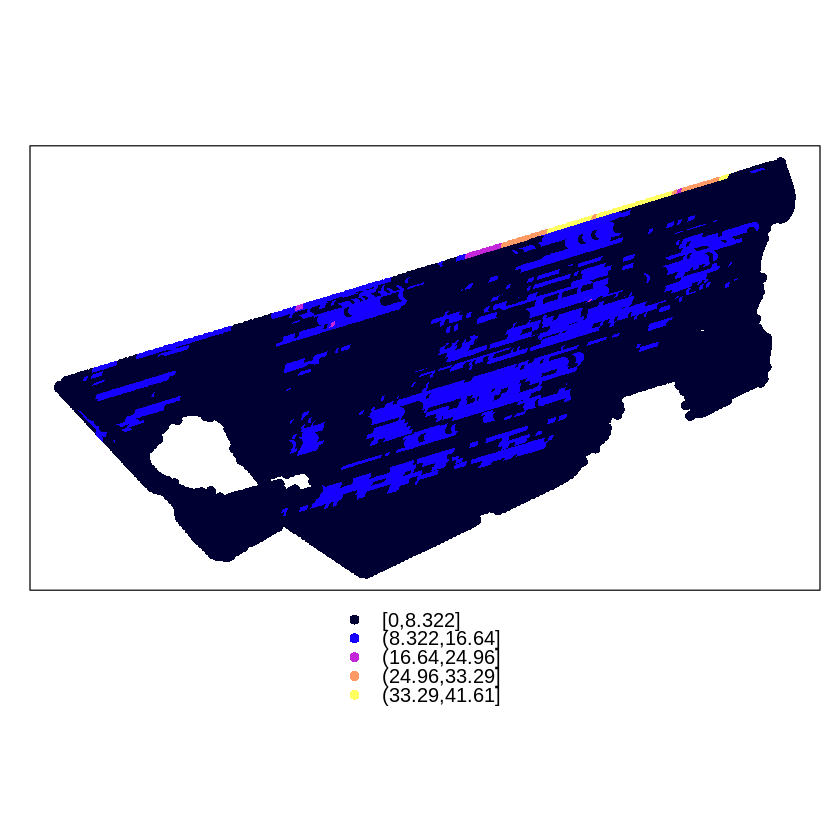

In [7]:
##COMPLETAR ESTOS VALORES CON LOS CORRECTOS######
indicador_archivos<-9        #                                                
#################################################
#Si la variable de interes tiene espacio reescribir el espacio como "."
ingresar_datos(indicador_archivos,"YIELD")



5- Importa los limites del lote a travez de un poligono de tipo shape. Para ello identificamos el archivo con extension ".shp" de la lista generada en punto 3 y lo pasamos a la variable **indicador_archivos**


Warning message:
“shapelib support is provided by GDAL through the sf and terra packages among others”


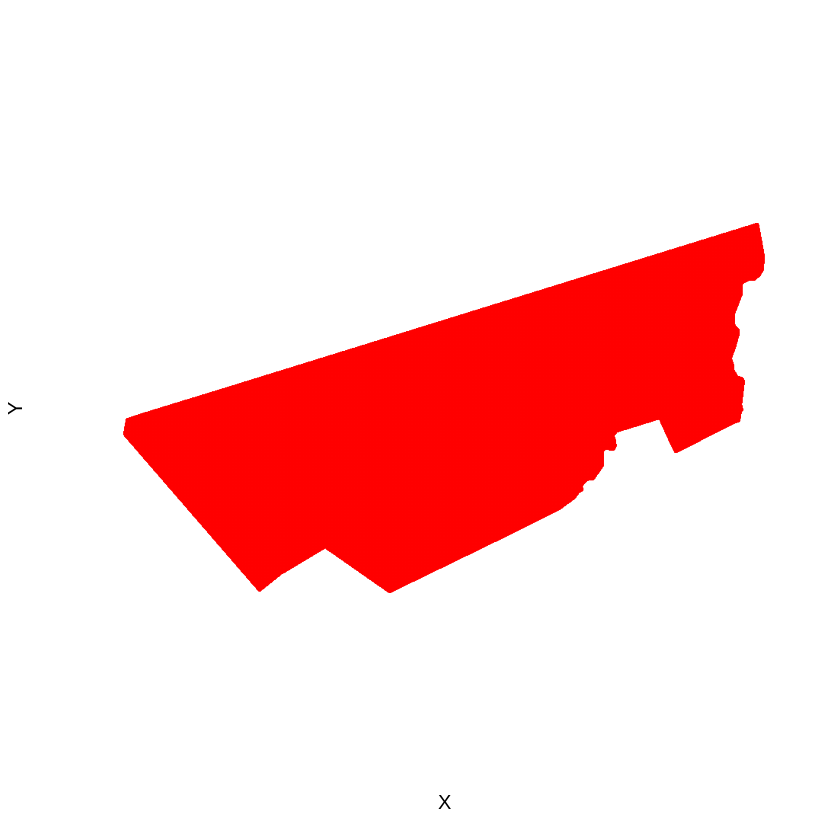

In [8]:
 ##COMPLETAR ESTOS VALORES CON LOS CORRECTOS####
 indicador_archivos<-5                   #
#################################################
 importar_poligono(indicador_archivos)


# Depuración de datos.  
En esta etapa vamos a filtrar los datos de rendimientos de valores anomalos, de tipo "outliers" datos que se alejan de los valores normales y de "inliers" datos diferentes a datos cercanos. Basado en: **"A pedometric technique to delimitate soil-specific zones at field scale"**, Vega, Cordoba et al. 

[1] "Media: 4.96350170709793"
[1] "DE: 4.0547135013785"
[1] "LI -3.14592529565906"
[1] "LS 13.0729287098549"
[1] "Filtrando datos"
Deleting rows:  51 52 53 54 55 56 57 58 59 92 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 3420 3421 4342 5209 5807 7463 7606 
[1] "Se filtraron 79 puntos"


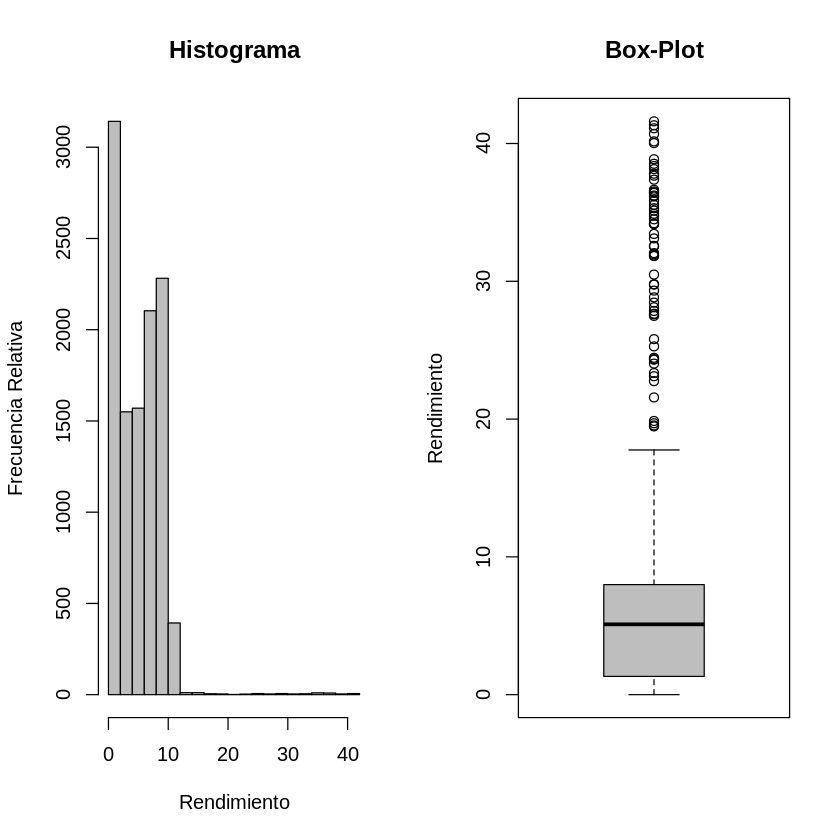

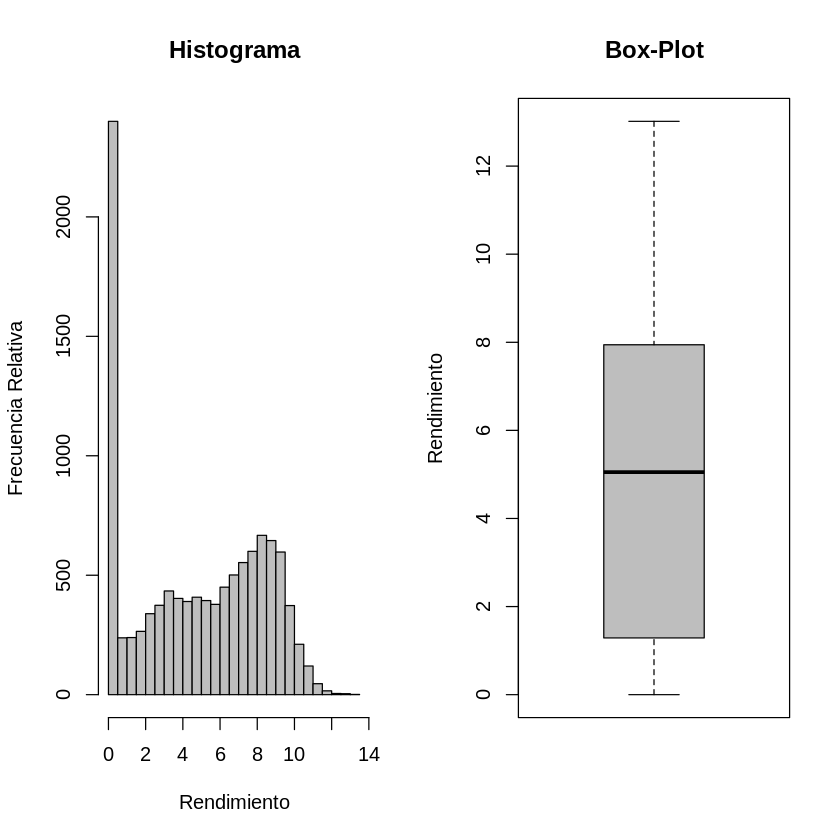

In [9]:
#### ESTA FUNCION ELIMANA VALORES EXTREMOS ############
######################################################

outlier("si")



In [10]:
#### ESTA FUNCION ELIMINA VALORES NO SEMEJANTES A SUS CERCANOS ############
##########################################################################
#indicar la distancia maxima de busqueda, para mapas de rendimiento 30, mapa de tosca 100
inliers(30)

ERROR: ignored

# Interpolacion por metodo de distancia inversa ponderada

Este metodo es ampliamente utilizado por su facilidad de calculo y rapidez. No presenta ninguna consideracion geoestadistica de los datos y tiede a formar distibuciones de tipo "ojo de buey"

[inverse distance weighted interpolation]


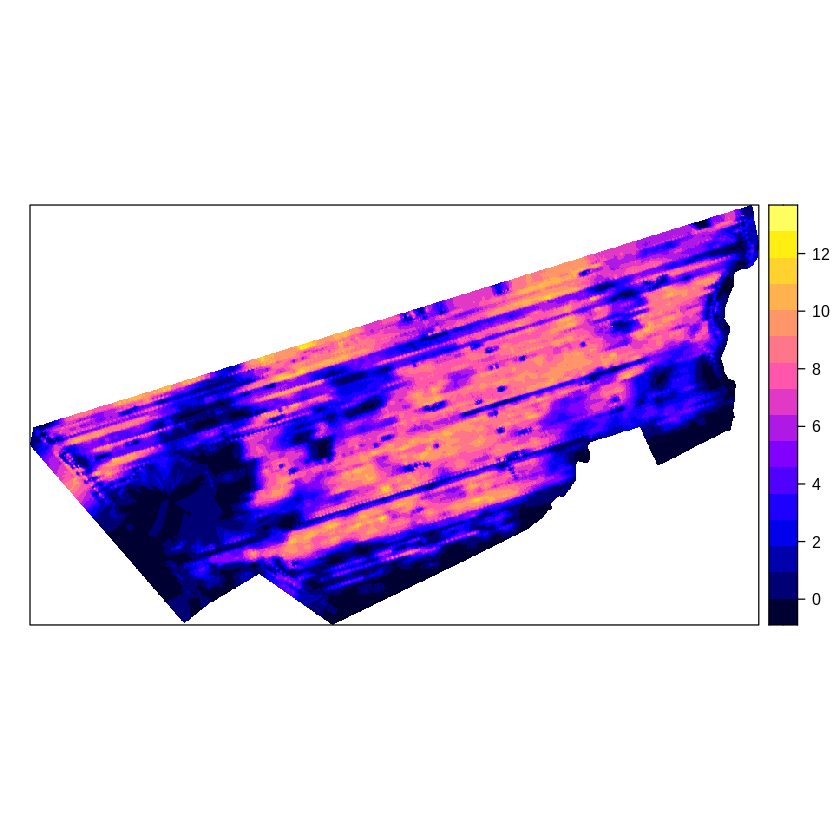

In [11]:
mapa_idw()


# Interpolacion por metodo de Kriging Ordinario. 
El metodo de Kriging presenta consideraciones geoestadisticas de los datos. Se basa en el uso del semivariograma. 

**¿Que es eso?** Es una representación grafica de la similitud de los datos a  distancias fijadas.

**Mmm, como?**  Para cada punto se calcula la diferencia con sus puntos cercanos, a medida que la distancia aumenta se espera que la diferencia sea mas grande. Eso se hace para todos los puntos del mapa y se promedian para ver la tendencia

**Y como hago un mapa con eso?** El paso posterior es "modelar" es decir ajustar una funcion matematica (puede ser tan simple como una lineal) al semivariograma.

**Es todo automatico, como el anterior** Casi, este tiene algo mas de magia humana, pero ofrece mas información.

**Todos los datos se ajustan?** No, si no hay una buena correlacion espacial entre los puntos puede no haber modelo que se pueda aplicar.

**Y que hago en ese caso?** Podes usar IDW o sacar mas puntos, o tomar unos mates pensando el porque.

**Ok vamos de a poco....**

1- Calculamos el semivariograma.

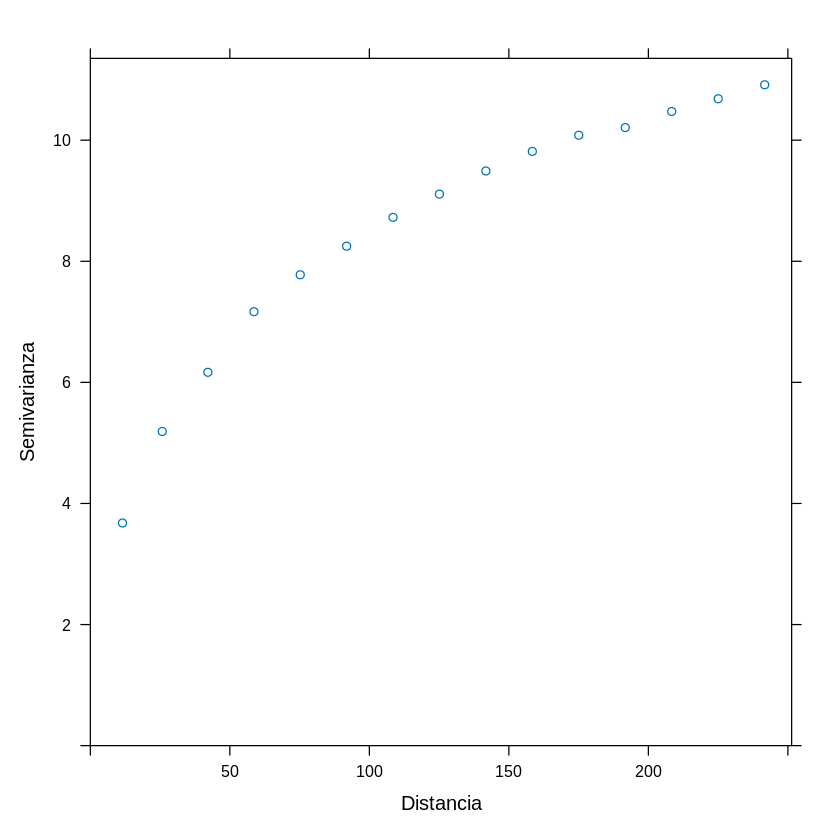

In [12]:
semivariograma()

2- Ajustamos algun modelo al semivariograma. La cantidad de modelos dispoibles es amplia desde la siguiente pestaña se puede consultar todos los disponibles. Los mas tradicionales Esferico "Sph", Exponencial ("Exp") y Gaussiano ("Gau").

Aca viene la parte humana. Al codigo hay que ingresarle 4 valores. Sill, Range, Nugget y Modelo.

**Sill:** Es el valor del eje y donde el semivariograma no crece mas.

**Range** Es el valor del eje x a partir del cual el semivariograma no aumenta considerablemente su valor.

**Nugget:** Es el valor del eje y mas bajo que puede tomar el semivariograma.

**Modelo:** Es la abreviacion de los modelos disponibles: "Sph","Exp","Gau","Lin".

**Graficamente seria asi:**


<img height="300px" align="center" hspace="10px" src="https://drive.google.com/uc?export=view&id=1Spkng8nlF-pcwC6umU8qQuUZszgp16wx">




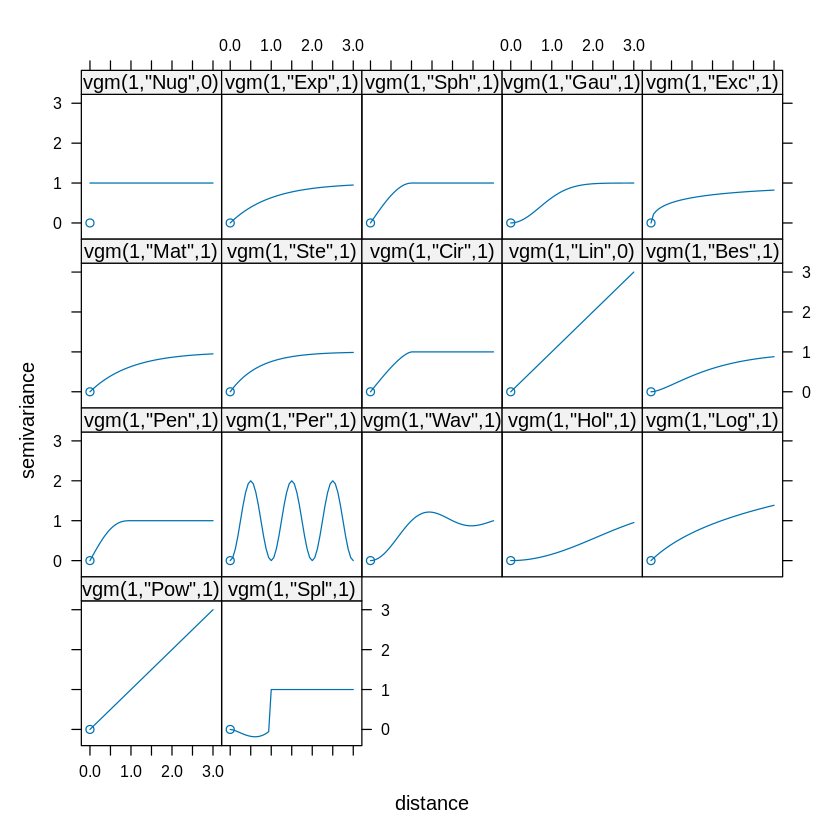

In [13]:
#Ejecuta este codigo si quieres ver los modelos disponibles.
print(show.vgms())

[1] 1159073


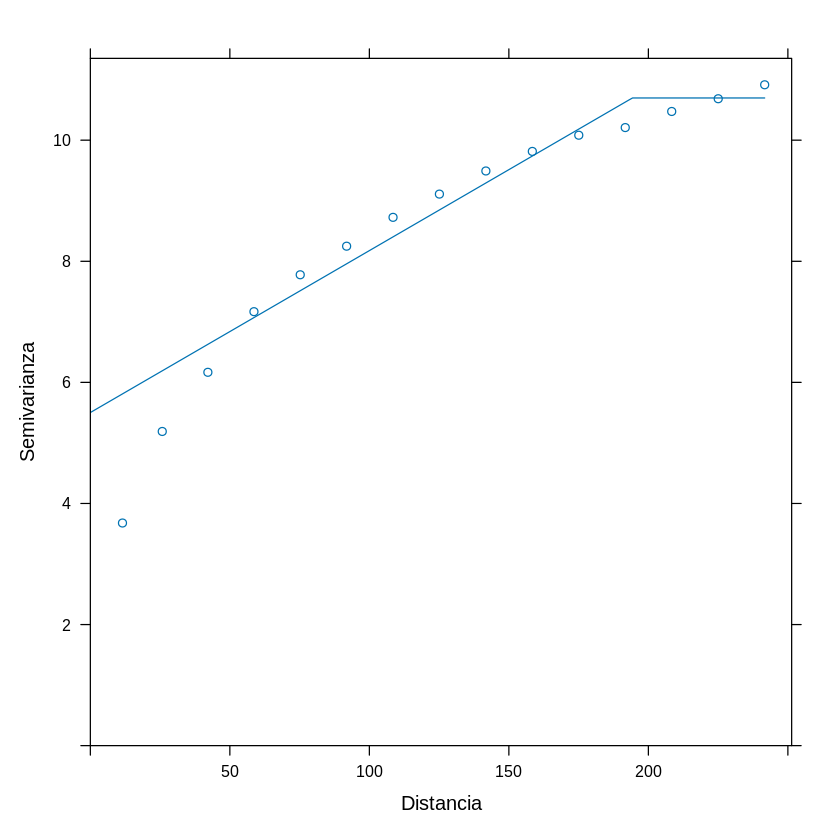

In [14]:
#Ajusta los siguientes valores a tu semivariograma y corre el codigo.#######
sill <- 10                                                                  # 
nugget <- 10                                                                # 
range <-200                                                                #
modelo <- "Lin"                                                            # 
############################################################################

modelo_semivariograma()


NUEVO! Si queres seguir peleandote con mis ideas hize una funcion para autoajustar el semivariograma. Fijate si anda!

[1] "ARMO VARIOGRAMA"
[1] 1
[1] "Sph"
[1] 451507.6
[1] 2
[1] "Exp"
[1] 83919.11
[1] "Por ahora el mejor modelo es Exp"
[1] 3
[1] "Lin"
[1] 1824734
[1] 4
[1] "Gau"
[1] 821113.7
[1] 5
[1] "Ste"
[1] 83919.11
[1] "Por ahora el mejor modelo es Ste"
[1] 6
[1] "Mat"
[1] 83919.11
[1] "Modelo final Ste"


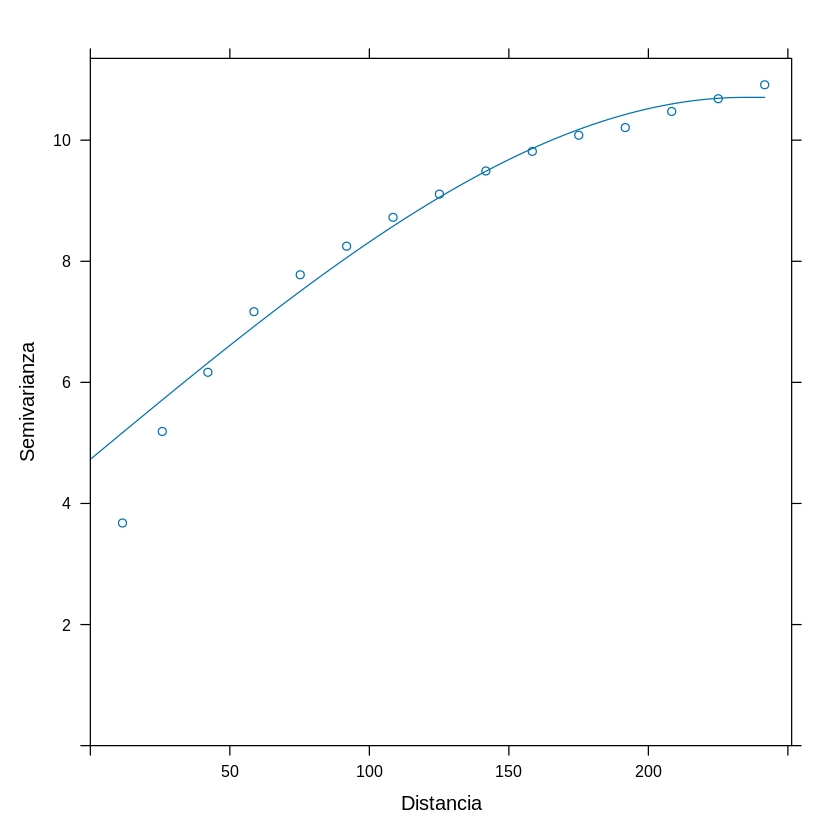

In [15]:
auto_semivariograma()

8- Krigeaje. El siguiente codigo debe generar el mapa por el metodo de Kriging ordinario.

[1] "Datos originales"
[1] 11051
[1] "Datos filtrados"
[1] 11051
[using ordinary kriging]
100% done


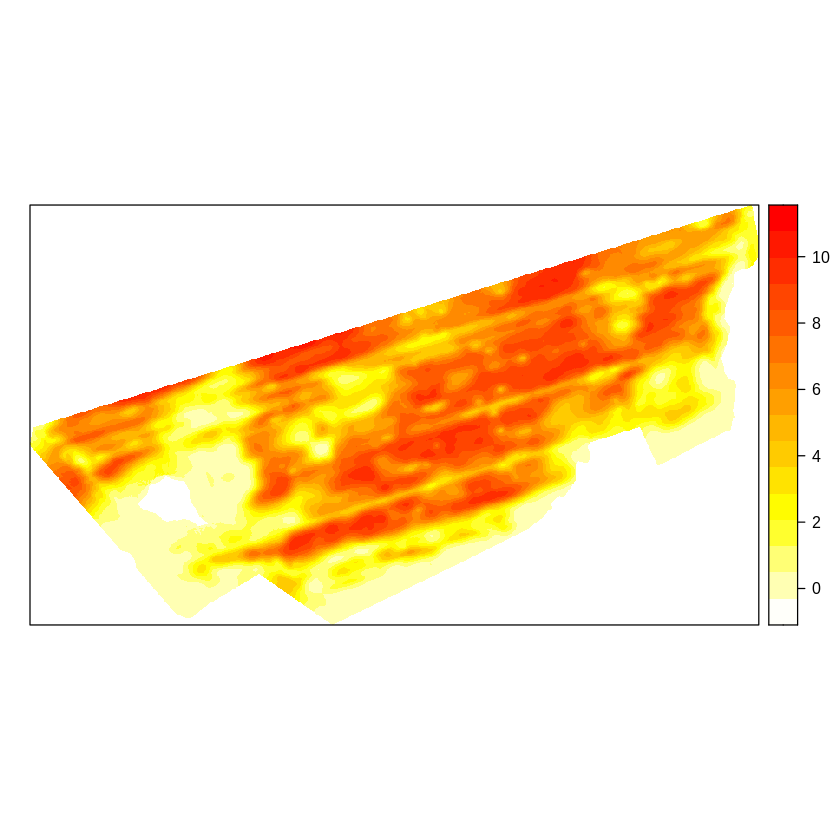

In [16]:
#ATENCION!! la distancia de busqueda del algoritmo depende de la distancia de los puntos para mapas 
# de rendimiento entre 20 y 40 m es recomendable.
#mapa de tosca usar 200 m
#Distancia mas largas (40m) tienden a suavizar los mapas. 

##COMPLETAR ESTE VALOR CON EL CORRECTO####
 distancia<-40                     
#################################################

mapa_kriging(distancia)

Si qures saber la precisión de nuestro mapas podemos realizar una validación cruzada. En la cual se generan una cantidad de mapas como puntos existan, extrayendo aleatoriamente un punto en capa corrida, siendo estimado con los restantes. Se busca  una alto valor de observados vs predichos **(cor_obspred)** y una baja diferencia entre valores reales y estimados **(RMSE).** 

El valor de **cor_obspred** es adimensional siendo el valor maximo lograble 1 (predicción perfecta).

El valor de **RMSE** esta expresado en las mismas unidades que los datos y se puede leer como para cualquier punto del mapa el Rinde esperado es el indicado por el mapa ± **RMSE**

---



In [ ]:
validacion(distancia)

            krige.cv_output
mean_error       -0.0001451
me_mean          -5.149e-05
MAE                  0.2028
MSE                 0.06776
MSNE                 0.9312
cor_obspred          0.9328
cor_predres         0.03385
RMSE                 0.2603
RMSE_sd              0.3606
URMSE                0.2603
iqr                  0.3288


## Suavizado de mapas
El suavizado consiste en la aplicacion de una ventana movil de tamaño elegible por el usuario 3x3, 5x5, 9x9, 13x13. A mayor ventana mayor suavizado. Para cada ventana se puede aplicar los estadisticos media, mediana, moda, min o max

[1] "raster ya esta.."
[1] "13 x 13"
[1] "Se aplico la media"


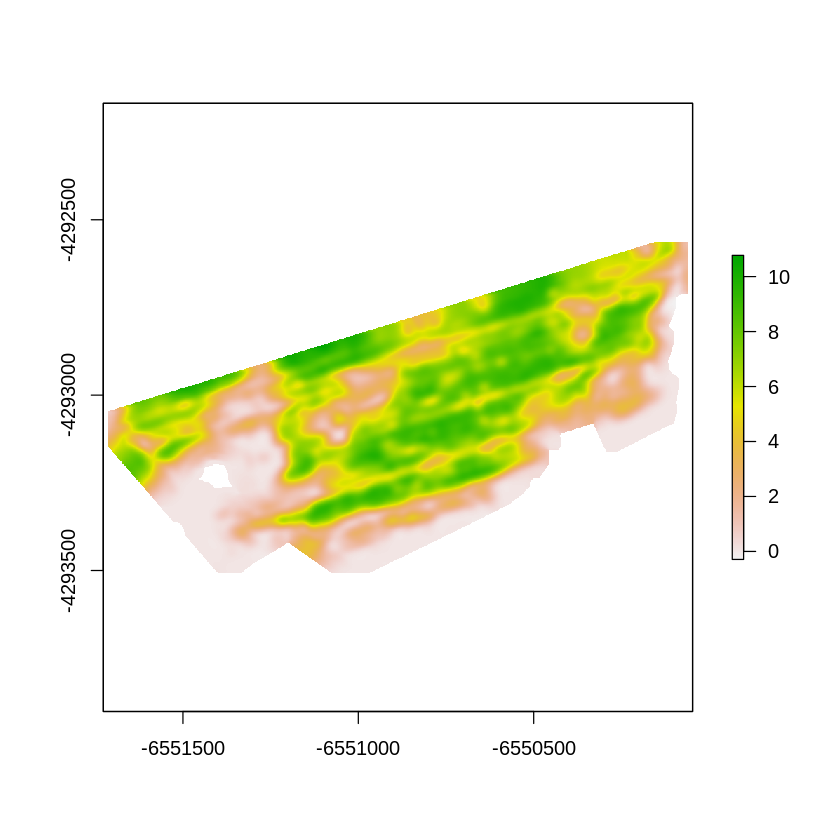

In [17]:
#Si se desar exportar IDW cambiar "kriging" por "idw"
que_mapa <- "kriging"
#Ventana, 3, 5, 9, 13
Ventana<- 13
#Estadistico a utilizar.
estadistico<- "media"
suavizado(estadistico,Ventana)

# Descargar mapas a la computadora local

9- Exportamos a la computadora local cuatro tipos de archivo, un archivo en formato **Raster**, uno de tipo **Shape** , otro en formato **KML** y una vista previa del mapa logrado y el histograma en **PDF**. El **Shape** y el **KML** simplifican el raster en 8 zonas dado por umbrales de los cuantiles 0, 0.10, 0.25, 0.50, 0.75 y 1.

Cambiar el valor de **"mapa de profundida"** por el nombre que se quisiera. Los archivos se alojan en la misma carpeta donde se subieron los archivos iniciales.  La variable **"que_mapa"** puede tomar dos valores:


**que_mapa<-"kriging"** Se descarga el mapa de kriging
**que_mapa<-"idw"** Se descarga el mapa de distancia inversa ponderada.

La versión simplifcada convierte el mapa interpolada en 4 clases, la version no simplicada realiza la conversión a 7 clases. 
Para cambiar de una a otra cambiar el argumento **"si"** por **"no"**.  

Si se genero un mapa suavizado del kriging puede ser descargado cambiando la opcion **"descargar_suaveraster"** de **"no"** a **"si"** (respetar comillas)

Una vez proceado Actualize el contenido desde la viñeta a su izquierda y haga click derecho en los archivos a descargar.




[1] "sp ya esta.."
[1] "gstat ya esta.."
[1] "maptools ya esta.."
[1] "rgeos ya esta.."
[1] "raster ya esta.."
[1] "automap ya esta.."
[1] "spdep ya esta.."
[1] "grid ya esta.."


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridGraphics’, ‘yulab.utils’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "ggplot2 ya esta.."


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘jpeg’, ‘png’, ‘rjson’, ‘prettymapr’, ‘rosm’




[1] "ACA ESTA LA VECTORIZACION"


Warning message:
“GEOS support is provided by the sf and terra packages among others”
Warning message in gBuffer(vectorizado, width = 0, byid = T):
“Polygons object missing comment attribute ignoring hole(s). See function createSPComment.”
Warning message in gBuffer(vectorizado, width = 0, byid = T):
“Polygons object missing comment attribute ignoring hole(s). See function createSPComment.”
Warning message in gBuffer(vectorizado, width = 0, byid = T):
“Polygons object missing comment attribute ignoring hole(s). See function createSPComment.”
Warning message in gBuffer(vectorizado, width = 0, byid = T):
“Polygons object missing comment attribute ignoring hole(s). See function createSPComment.”
Warning message in gBuffer(vectorizado, width = 0, byid = T):
“Polygons object missing comment attribute ignoring hole(s). See function createSPComment.”
Warning message in gBuffer(vectorizado, width = 0, byid = T):
“Polygons object missing comment attribute ignoring hole(s). See function createSP

[1] "generando buffer para solucionar problemas de geometria"


Warning message:
“PROJ support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


[1] "ACA ARMO EL PDF"


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Saving 6.67 x 6.67 in image


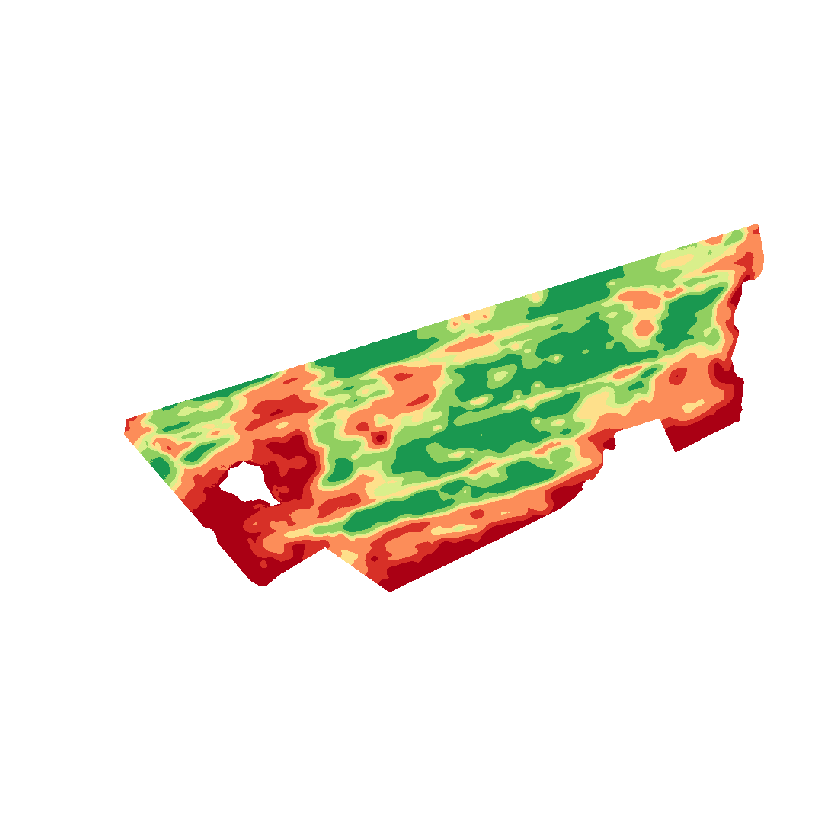

[1] "ACA ARMO EL KML"


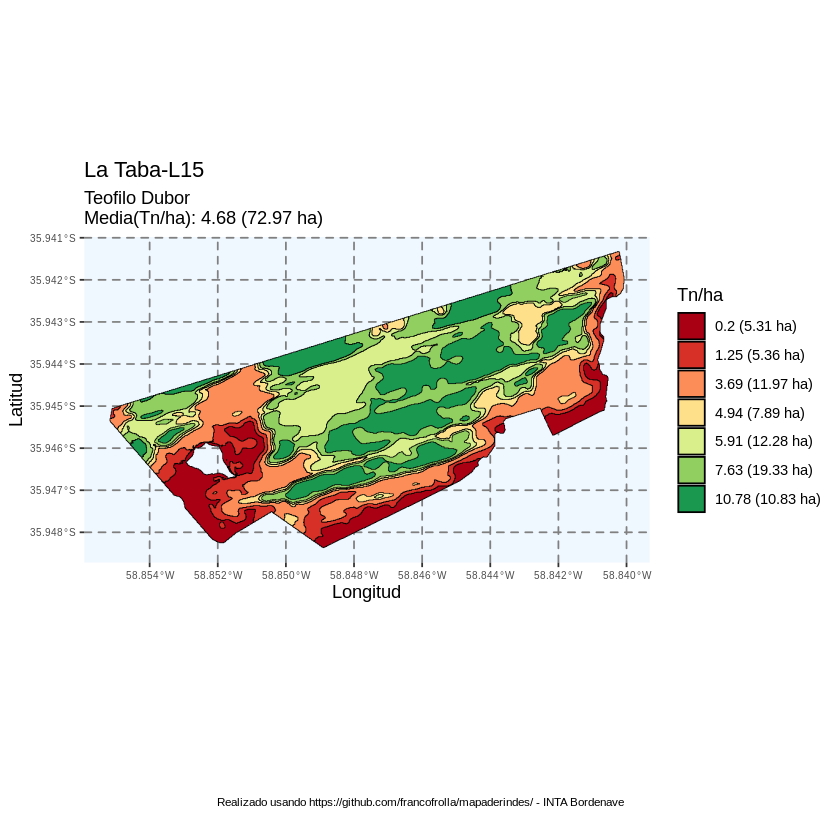

In [18]:
##COMPLETAR ESTOS VALORES CON LOS CORRECTOS####
#Nombre a colocar en los archivos a generar Ej: "Lote La DamaJuana 1"
nombre<-"La Taba-L15"
#Si se desar exportar IDW cambiar "kriging" por "idw"
que_mapa<-"kriging"
#Para uso en el pdf, se puede poner la info que se quiere
detalleslote <-"Teofilo Dubor"
#Unidad de trabajo de la maquina
unidad_de_cosecha<-"Tn/ha"
#Elegir entre la version simplicada o no. 
version_simplificada<-"no"
#Esta opcion descarga el raster suavizado sobre el original
descargar_suaveraster<-"no"                               #
################################################

exportar2(nombre,detalleslote,unidad_de_cosecha,version_simplificada,descargar_suaveraster)


## Rendimiento medio Normalizado.
Permite dividir el mapa logrado en 2-3-4 areas homogeneas usando el algoritmo Fuzzy C Means.





Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "e1071 ya esta.."
[1] "rgdal ya esta.."
[1] "units ya esta.."
[1] "rgeos ya esta.."


Loading required package: psych


Attaching package: ‘psych’


The following object is masked _by_ ‘.GlobalEnv’:

    outlier


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The following object is masked from ‘package:raster’:

    distance


Loading required package: e1071


Attaching package: ‘e1071’


The following object is masked from ‘package:raster’:

    interpolate


Loading required package: smoothr


Attaching package: ‘smoothr’


The following object is masked from ‘package:stats’:

    smooth


Loading required package: units

udunits database from /usr/share/xml/udunits/udunits2.xml



[1] 1


Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


[1] "elimino bordes incorrectos"


Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


[1] "generando buffer para solucionar problemas de geometria"


Warning message:
“GEOS support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”
Warning message:
“OGR support is provided by the sf and terra packages among others”


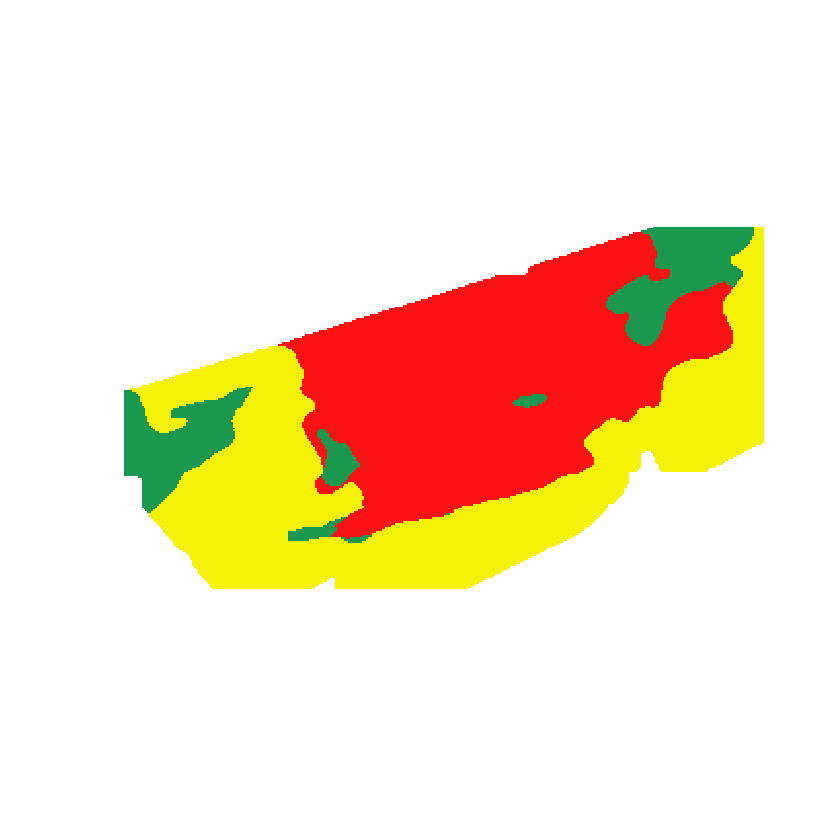

In [19]:
##COMPLETAR ESTOS VALORES CON LOS CORRECTOS####
#Nombre a colocar en los archivos a generar Ej: "Lote La DamaJuana 1"
Nombre<-"Lote 15"
#Si se desar usar IDW cambiar "kriging" por "idw"
que_mapa<-"kriging"
#Separar mapa de rendimiento en 2,3 o 4 zonas
Zonas <-3
#Reducir indica el grado de simplificacion del mapa > 2 mas simplificado, < 2 mas elementos originales
Reducir<-2
#Eliminar todas las areas menores a una superficie igual a
Area_ha<-1
                            #
################################################

rmn(nombre,Zonas,Reducir,Area_ha)

## En desarrollo..

In [ ]:
rmn<-function(nombre,Zonas,Reducir,Area_ha){
  if (que_mapa == "idw") {Kg_wls <<-prof.idw}
  Kg_wls<-raster(Kg_wls)

  lista<-list(Kg_wls)
	#27/07/2020- Franco Frolla - Derechos reservados. 

	if("psych" %in% rownames(installed.packages()) == FALSE) {install.packages("psych")} else {print("psych ya esta..")}
	if("smoothr" %in% rownames(installed.packages()) == FALSE) {install.packages("smoothr")} else {print("smoothr ya esta..")}
	if("e1071" %in% rownames(installed.packages()) == FALSE) {install.packages("e1071")} else {print("e1071 ya esta..")}
	if("rgdal" %in% rownames(installed.packages()) == FALSE) {install.packages("rgdal")} else {print("rgdal ya esta..")}
	if("units" %in% rownames(installed.packages()) == FALSE) {install.packages("units")} else {print("units ya esta..")}
	if("rgeos" %in% rownames(installed.packages()) == FALSE) {install.packages("rgeos")} else {print("rgeos ya esta..")}


	require(psych)
	require(e1071)
	require(rgeos)
	require(smoothr)
	require(units)

	#Genero grilla para hacer los clusters
	grid <- makegrid(Poligono, cellsize = 5)
	coordinates(grid)<-c("x1","x2")
	proj4string(grid) <- crs(Poligono)
	recortegrilla <- raster::crop(grid,Poligono)

	#Genero un stack de imagenes raster

	for (i in 1:length(lista)){
	    lista[[i]]<-lista[[i]]/cellStats(lista[[i]], stat='mean', na.rm=TRUE)
	    if (i>1){lista[[i]] <- resample(lista[[i]],lista[[1]])}    
	  }


	lista<-stack(lista)

	#Extraigo valores de cada capa normalizada. 

	nombres<-c("")
	matrizdatos<-seq(1,length(recortegrilla),1)

	for (i in 1:length(lista@layers)){
	  print(i)
	  data<-extract(lista[[i]],recortegrilla)
	  matrizdatos<-cbind(matrizdatos,data)
	  nombre<-lista[[i]]@data@names
	  nombres<-c(nombres,nombre)

	}


	datos<-data.frame(matrizdatos,recortegrilla@coords[,1],recortegrilla@coords[,2])
	colnames(datos)<-c(nombres,"x","y")

	#SACO LA VARIABLE DUMMY
	datos<-datos[2:ncol(datos)]
	#elinimo datos inexistentes
	datos<-na.omit(datos)

	#Genero los clusters
	if(Zonas==2){MC_2<-cmeans(datos[,2:ncol(datos)-2],2,100,method="cmeans",m=1.3)}
	if(Zonas==3){MC_3<-cmeans(datos[,2:ncol(datos)-2],3,100,method="cmeans",m=1.3)}
	if(Zonas==4){MC_4<-cmeans(datos[,2:ncol(datos)-2],4,100,method="cmeans",m=1.3)}

	#Extraigo la data
	if(Zonas==2){datos1<-cbind(datos,unname(MC_2$cluster))}
	if(Zonas==2){colnames(datos1)<-c(colnames(datos),"zonas2")}
	if(Zonas==3){datos1<-cbind(datos,unname(MC_3$cluster))}
	if(Zonas==3){colnames(datos1)<-c(colnames(datos),"zonas3")}
	if(Zonas==4){datos1<-cbind(datos,unname(MC_4$cluster))}
	if(Zonas==4){colnames(datos1)<-c(colnames(datos),"zonas4")}


	#datos1<-cbind(datos,unname(MC_2$cluster),unname(MC_3$cluster),unname(MC_4$cluster))
	#colnames(datos1)<-c(colnames(datos),"zonas2","zonas3","zonas4")

	coordinates(datos1)<-c("x","y")



	if(Zonas==2){r <- rasterFromXYZ(data.frame(datos1@coords[,1], datos1@coords[,2],datos1@data["zonas2"]))}
	if(Zonas==3){r <- rasterFromXYZ(data.frame(datos1@coords[,1], datos1@coords[,2],datos1@data["zonas3"]))}
	if(Zonas==4){r <- rasterFromXYZ(data.frame(datos1@coords[,1], datos1@coords[,2],datos1@data["zonas4"]))}


	#Función para aplicar gdal_polygonize en R

	gdal_polygonizeR <- function(x, outshape=NULL, gdalformat = 'ESRI Shapefile',
				     pypath=NULL, readpoly=TRUE, quiet=TRUE) {
	  if (isTRUE(readpoly)) require(rgdal)
	  if (is.null(pypath)) {
	    pypath <- Sys.which('gdal_polygonize.py')
	  }
	  if (!file.exists(pypath)) stop("Can't find gdal_polygonize.py on your system.")
	  owd <- getwd()
	  on.exit(setwd(owd))
	  setwd(dirname(pypath))
	  if (!is.null(outshape)) {
	    outshape <- sub('\\.shp$', '', outshape)
	    f.exists <- file.exists(paste(outshape, c('shp', 'shx', 'dbf'), sep='.'))
	    if (any(f.exists))
	      stop(sprintf('File already exists: %s',
			   toString(paste(outshape, c('shp', 'shx', 'dbf'),
					  sep='.')[f.exists])), call.=FALSE)
	  } else outshape <- tempfile()
	  if (is(x, 'Raster')) {
	    require(raster)
	    writeRaster(x, {f <- tempfile(fileext='.tif')})
	    rastpath <- normalizePath(f)
	  } else if (is.character(x)) {
	    rastpath <- normalizePath(x)
	  } else stop('x must be a file path (character string), or a Raster object.')
	  system2('python', args=(sprintf('"%1$s" "%2$s" -f "%3$s" "%4$s.shp"',
					  pypath, rastpath, gdalformat, outshape)))
	  if (isTRUE(readpoly)) {
	    shp <- readOGR(dirname(outshape), layer = basename(outshape), verbose=!quiet)
	    return(shp)
	  }
	  return(NULL)
	}
	crs(r)<-crs(Poligono)


	vectorizado <- gdal_polygonizeR(r)
	crs(vectorizado)<-crs(Poligono)


	#Suavizado


	require(smoothr)
	require(units)

	vectorizado1 <- smooth(vectorizado, method = "ksmooth", smoothness = Reducir)


	#REMUEVO POLIGONOS CON UN AREA MENOR A 1 ha
	vectorizado1@data$area<-(raster::area(vectorizado1,na.rm=TRUE))/10000
	vectorizado2 <- vectorizado1[vectorizado1$area > Area_ha,]


	r <- raster(vectorizado2, res=5)
	r <- rasterize(vectorizado2, r,field = vectorizado2$DN, background=NA)

	#poligono2 = gUnaryUnion(poligono)
	rpoly <- raster(Poligono, res=5)
	rpoligono <- rasterize(Poligono, rpoly,background=0)
	rpoligono[rpoligono] <- 0



	r <- resample(r, rpoligono)
	dif <- r - rpoligono
	dif[dif == 0] <- NA



	fill.na <- function(x) {
	  center = 0.5 + (width*width/2) 
	  if( is.na(x)[center] ) {
	    return( round(modal(x, na.rm=TRUE),0) )
	  } else {
	    return( round(x[center],0) )
	  }
	}  

	width = 13
	r2 <- focal(r, w = matrix(1,width,width), fun = fill.na, 
		    pad = TRUE, na.rm = FALSE)

	print("elimino bordes incorrectos")
	ventana<-matrix(1,nrow=9,ncol=9)

	r2 <-focal(r2,w=ventana,fun=modal,na.rm=TRUE)

	vectorizado <- gdal_polygonizeR(r2)

	print("generando buffer para solucionar problemas de geometria")

	vectorizado <- gBuffer(vectorizado, width=0, byid = T)
	vectorizado<-crop(vectorizado,Poligono)
  salida<<-vectorizado
  
 if(length(unique(vectorizado@data$DN))==2){cols<-c("#1a9850","#f5f107")}
 if(length(unique(vectorizado@data$DN))==3){cols<-c("#1a9850","#f5f107","#fc1212")}
 if(length(unique(vectorizado@data$DN))==4){cols<-c("#1a9850","#f5f107","#fc1212","#5412fc")}
  plot(vectorizado["DN"],col=cols,border="NA")




	writeOGR(vectorizado, layer = paste(Nombre," zonas",sep=""), dsn="vectorizado R", driver="ESRI Shapefile",overwrite_layer=TRUE)

}



